# Students Performance in Exams EDA

This data set consists of the marks secured by the high school students in various subjects.
We want to understand the influence of the parents background, test preparation etc on students performance.

#### Information about the dataset -

**gender**: Indicates whether the student is male or female.   
**race/ethnicity**: Describes the ethnic or racial group to which the student belongs (e.g., group A, B, C,D,E).    
**parental level of education**: Specifies the highest level of education attained by the student's parent or guardian (e.g., bachelor's degree, master's degree etc).    
**lunch**: Indicates whether the student receives standard lunch or free/reduced lunch.     
**test preparation course**: Specifies whether the student completed a test preparation course.      
**math score**: Numerical score achieved by the student in mathematics.     
**reading score**: Numerical score achieved by the student in reading comprehension.    
**writing score**: Numerical score achieved by the student in writing proficiency.     

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [5]:
df.duplicated().sum()

0

**Observations**     
There are 1000 rows , 8 columns ( 5 categorical, 3 numerical)  
No duplicate records   

## Univariate Analysis

In [6]:
df["gender"].nunique()

2

In [7]:
df['gender'].value_counts()              #balanced dataset

female    518
male      482
Name: gender, dtype: int64

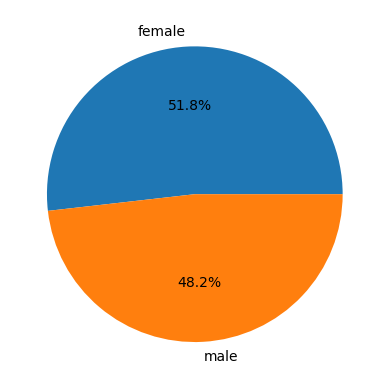

In [8]:
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct="%0.1f%%")
plt.show()

So, ratio of male and female is almost equal

In [9]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

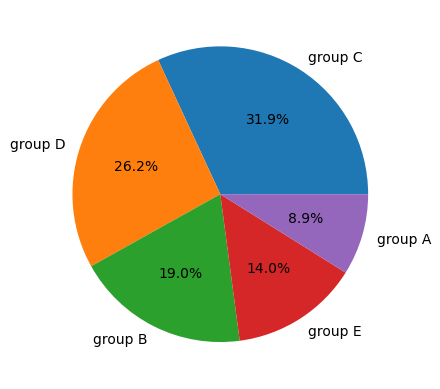

In [10]:
plt.pie(df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index, autopct="%0.1f%%")
plt.show()

Group A has least number of students, and Group C has most number of students.

In [11]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

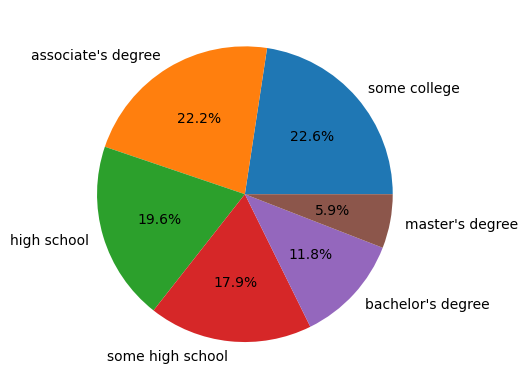

In [12]:
plt.pie(df['parental level of education'].value_counts(),labels=df['parental level of education'].value_counts().index
        , autopct="%0.1f%%")
plt.show()

Very less parents have a master's degree   
Most of parents have degree - some college, associate degree  
     
**This could be because of:**   
-  School could be in remote location or in some rural area   
-  Potential issue with how school collected information of parental level of education  

In [13]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

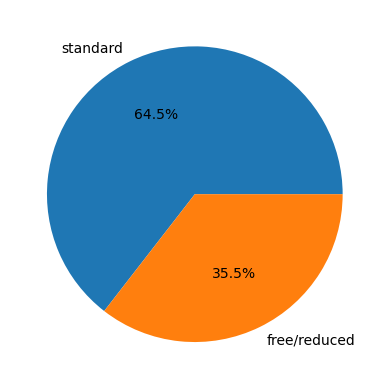

In [14]:
plt.pie(df['lunch'].value_counts(),labels=df['lunch'].value_counts().index, autopct="%0.1f%%")
plt.show()

-  600+ students eat standard lunch while 300+ eat free/reduced lunch.

In [15]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

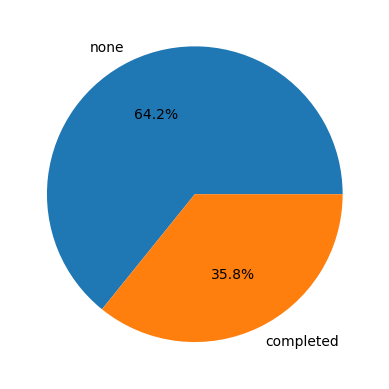

In [16]:
plt.pie(df['test preparation course'].value_counts(),labels=df['test preparation course'].value_counts().index, 
        autopct="%0.1f%%")
plt.show()

- 600+ students have not done test prep while 300+ have completed.

#### Math score

In [17]:
df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [18]:
(df['math score']==0).sum()

1

In [19]:
(df['math score']==100).sum()

7

<AxesSubplot:xlabel='math score', ylabel='Count'>

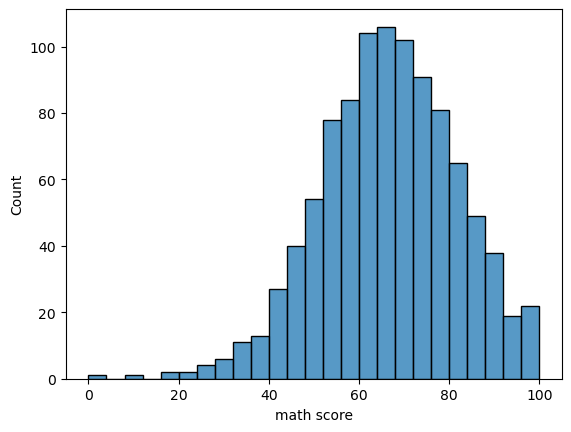

In [20]:
sns.histplot(df['math score'])

In [21]:
df['math score'].skew()

-0.27893514909431694

<AxesSubplot:xlabel='math score'>

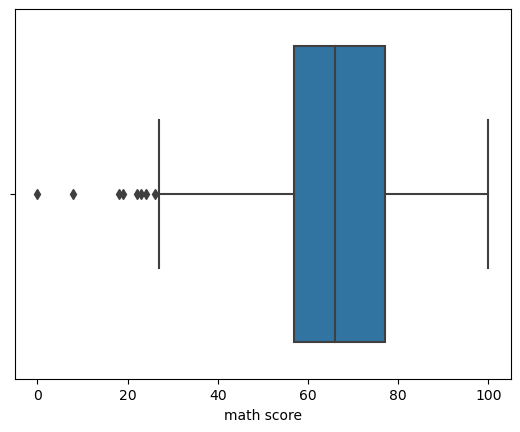

In [22]:
sns.boxplot(data = df, x = 'math score')

#### Findings

- mean marks scored in maths is 66
- median marks is 66
- min is 0, max is 100.
- 1 student scored 0, 7 scored 100
- data is not skewed
- some outliers are there

#### Reading Score

In [23]:
df['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

In [24]:
(df['reading score']==17).sum()

1

In [25]:
(df['reading score']==100).sum()

17

<AxesSubplot:xlabel='reading score', ylabel='Count'>

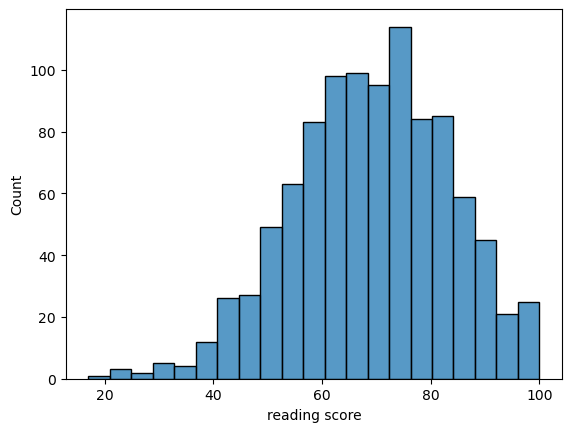

In [26]:
sns.histplot(df['reading score'])

In [27]:
df['reading score'].skew()

-0.25910451810923063

<AxesSubplot:xlabel='reading score'>

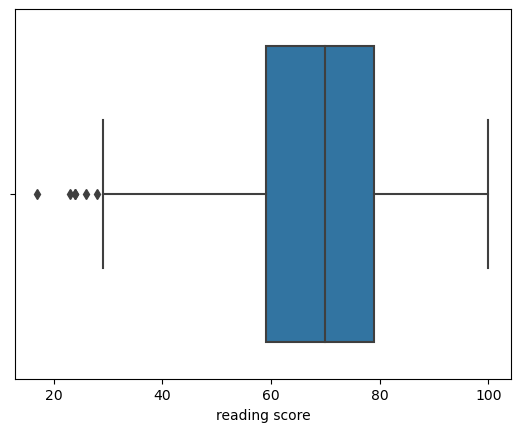

In [28]:
sns.boxplot(data = df, x = 'reading score')

In [29]:
df[df['reading score']<33]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
466,female,group D,associate's degree,free/reduced,none,26,31,38
596,male,group B,high school,free/reduced,none,30,24,15
601,female,group C,high school,standard,none,29,29,30
810,male,group A,some high school,standard,none,51,31,36
896,male,group B,high school,free/reduced,none,36,29,27


#### Findings
- mean marks scored here is 69
- meadian is 70
- min is 17, max is 100.
- 1 student scored 17, 17 scored 100
- data is not skewed
- some outliers are there

In [30]:
#### Writing Score

In [31]:
df['writing score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

In [32]:
(df['writing score']==10).sum()

1

In [33]:
(df['writing score']==100).sum()

14

<AxesSubplot:xlabel='writing score', ylabel='Count'>

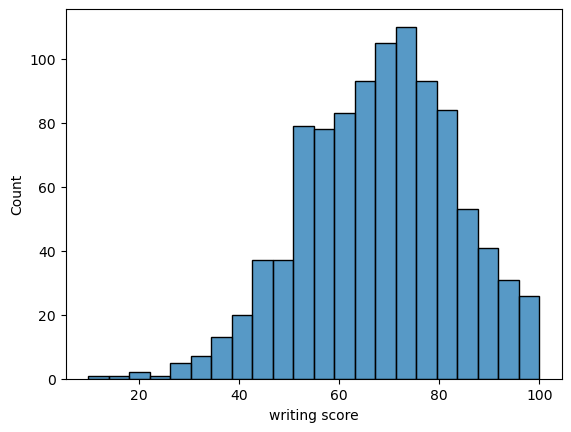

In [34]:
sns.histplot(df['writing score'])

In [35]:
df['writing score'].skew()

-0.28944397150761897

<AxesSubplot:xlabel='writing score'>

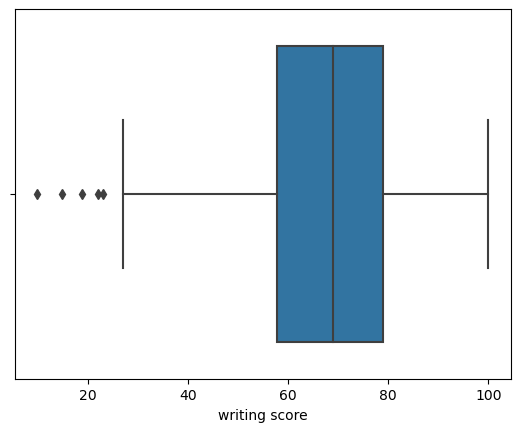

In [36]:
sns.boxplot(data=df,x='writing score')

In [37]:
df[df['writing score']<33]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
338,female,group B,some high school,free/reduced,none,24,38,27
363,female,group D,some high school,free/reduced,none,27,34,32
596,male,group B,high school,free/reduced,none,30,24,15
601,female,group C,high school,standard,none,29,29,30
787,female,group B,some college,standard,none,19,38,32


#### Findings
- mean marks scored here is 68
- median is 69
- min is 10, max is 100.
- 1 student scored 10, 14 scored 100
- data is not skewed
- some outliers are there

## Bivariate Analysis

<AxesSubplot:>

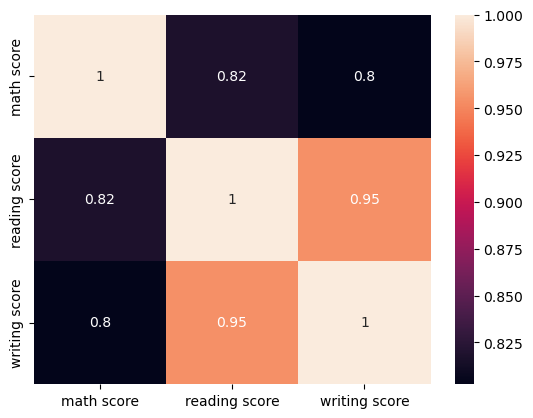

In [38]:
sns.heatmap(df.corr(),annot=True)

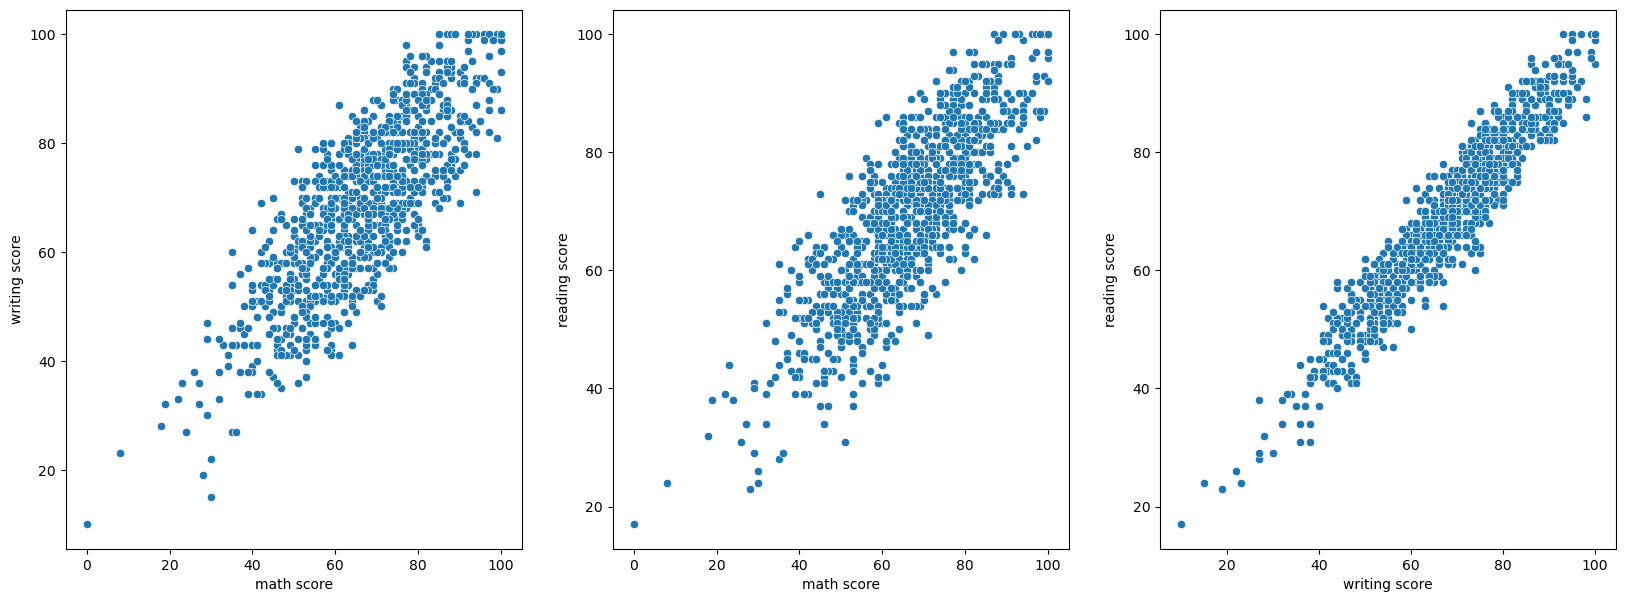

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))

sns.scatterplot(data=df, x='math score', y='writing score', ax=ax[0])
sns.scatterplot(data=df, x='math score', y='reading score', ax=ax[1])
sns.scatterplot(data=df, x='writing score', y='reading score', ax=ax[2])

plt.show()

### Gender vs Exam Score

In [40]:
df.groupby("gender")[list(df.columns[-3:])[0]].describe()            # math score

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


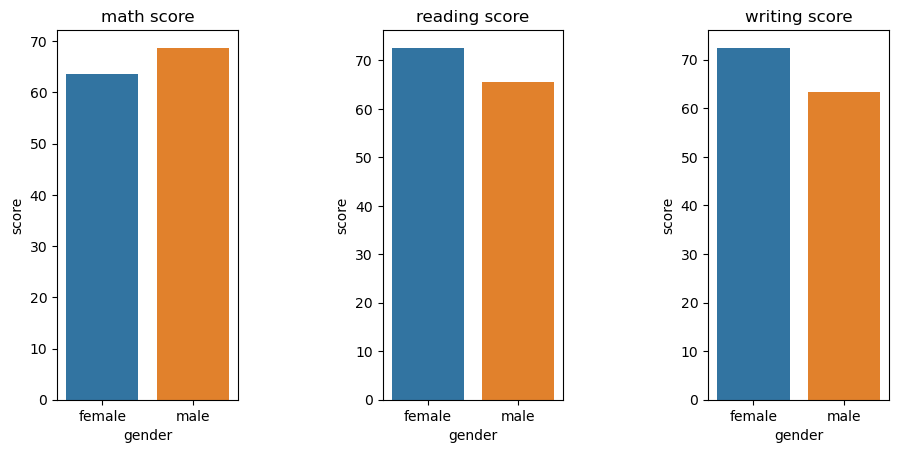

In [41]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for i in range(3):
    plt.subplot(1,3, i+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[i]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[i])
    
plt.show()

So , males have performed better in maths, and females in reading,writing

### Ethnicity vs Exam scores

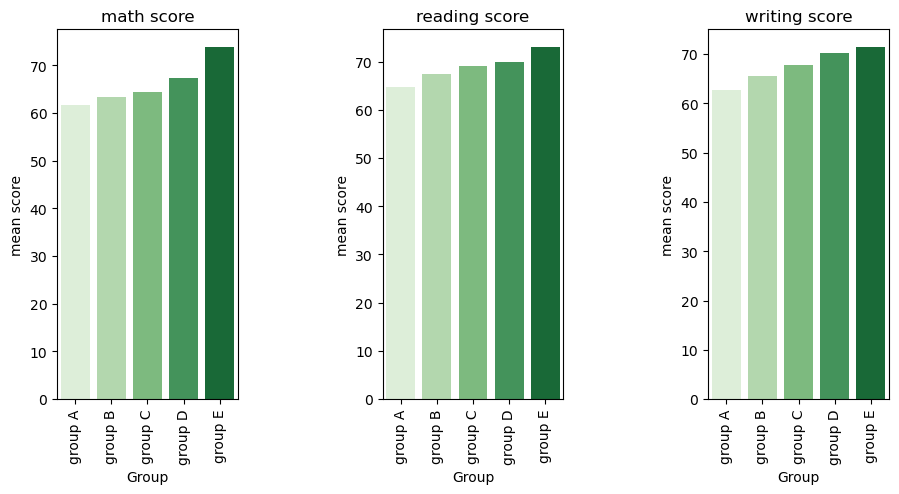

In [42]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for i in range(3):
    plt.subplot(1,3, i+1)
    ethn_df = df.groupby("race/ethnicity")[list(df.columns[-3:])[i]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values,palette='Greens')
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(df.columns[-3:])[i])
plt.show()

- Group E has best performance for all the fields, and group A is the worst.

### Test preparation by students vs exam score

<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

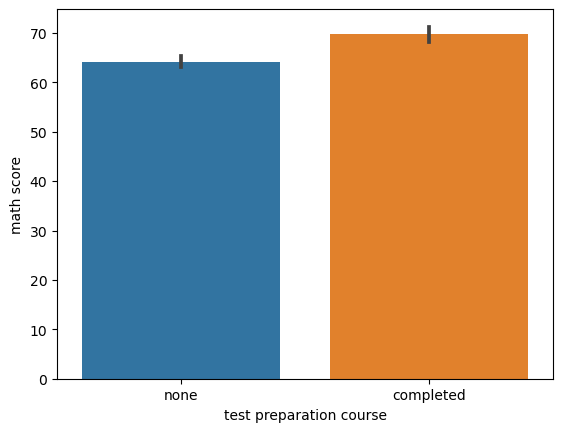

In [43]:
sns.barplot(data = df, y='math score', x='test preparation course')

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

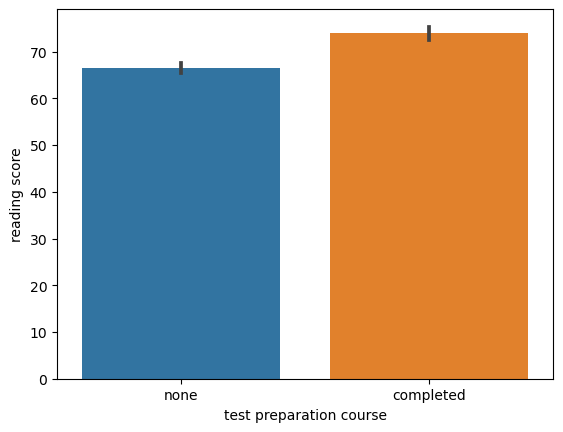

In [44]:
sns.barplot(data = df, y='reading score', x='test preparation course')

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

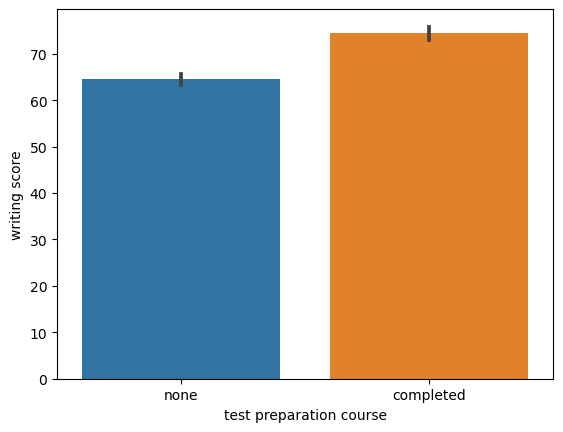

In [45]:
sns.barplot(data = df, y='writing score', x='test preparation course')

- In all the three cases, on an average, students who completed the test preparation course scored better marks.

### Lunch vs exam score

In [46]:
df['total_marks'] = df['math score']+df['reading score']+ df['writing score']

<AxesSubplot:xlabel='total_marks', ylabel='Density'>

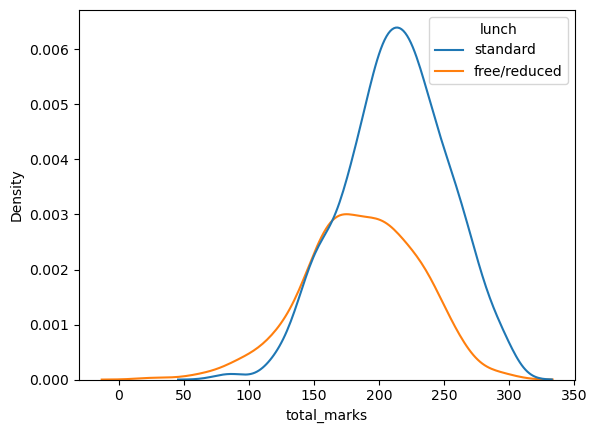

In [47]:
sns.kdeplot(data = df, x ='total_marks', hue='lunch')

-  On average student who got standard lunch performed better. so nutrition is an important factor here.

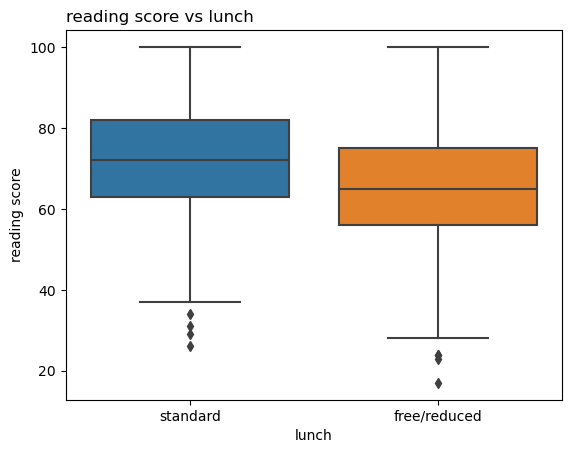

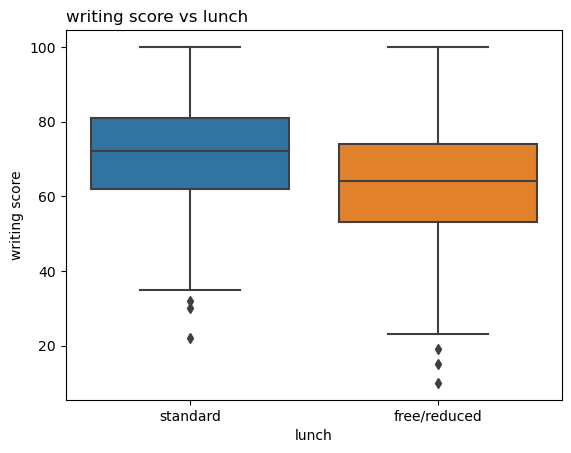

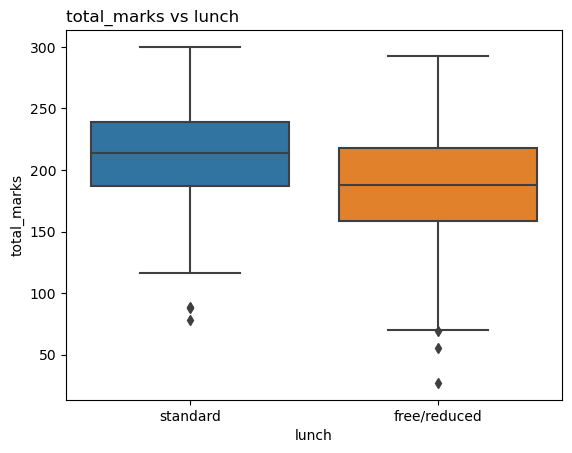

In [48]:
for i in df.columns[-3:]:
    sns.boxplot(x=df["lunch"], y=df[i])
    plt.title(i+" vs lunch", loc="left")
    plt.show()

### Parental Education vs Test preparation

In [49]:
cross_tab_prop = pd.crosstab(df['parental level of education'],df['test preparation course'])
cross_tab_prop

test preparation course,completed,none
parental level of education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


<AxesSubplot:xlabel='parental level of education'>

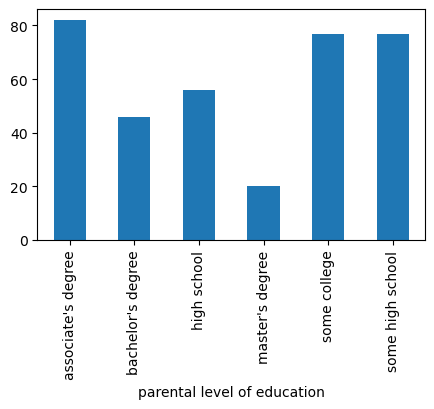

In [50]:
cross_tab_prop['completed'].plot(kind='bar',colormap='tab10', figsize=(5, 3))

In [51]:
cross_tab_prop_percent = pd.crosstab(df['parental level of education'],df['test preparation course'], normalize='index')
cross_tab_prop_percent

test preparation course,completed,none
parental level of education,,
associate's degree,0.369369,0.630631
bachelor's degree,0.389831,0.610169
high school,0.285714,0.714286
master's degree,0.338983,0.661017
some college,0.340708,0.659292
some high school,0.430168,0.569832


<AxesSubplot:xlabel='parental level of education'>

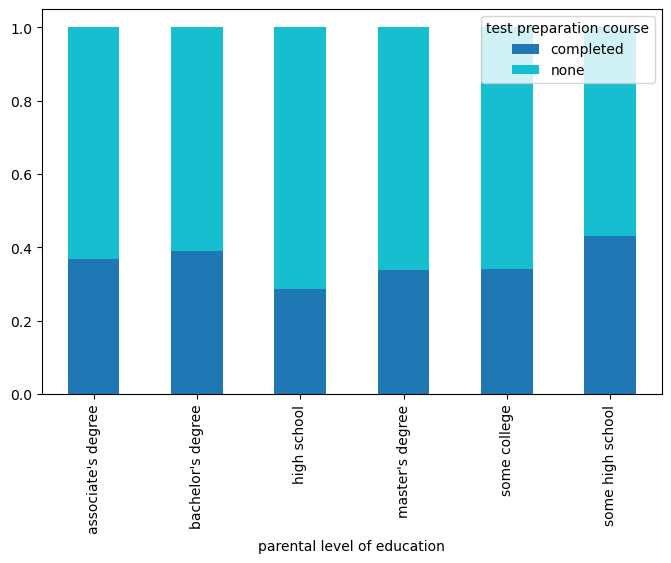

In [52]:
cross_tab_prop_percent.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(8, 5))

-  There's no clear relation between parental level of education and test preparation course.

### Parental education vs exam score

<AxesSubplot:xlabel='parental level of education', ylabel='total_marks'>

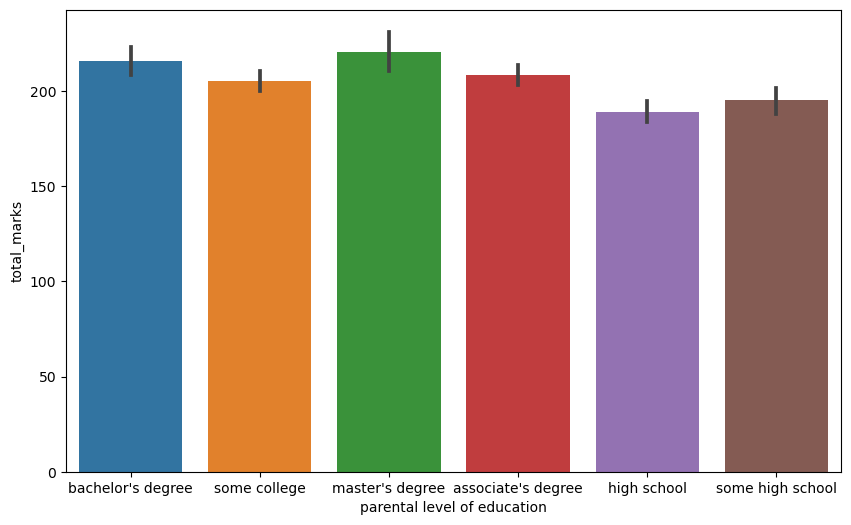

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x = 'parental level of education', y='total_marks')

- we can see there is direct relation between how the child is performing and how educated the parents are.  
- Average marks of students are is descending order as:   
     master's degree > bachelor's degree> associate degree > some college > some high school > high school

## Conclusions

1. On average, girls scored lower in math compared to boys.    
      
2. Girls achieved higher scores in reading and writing on average.    
       
3. Students from group E achieved the highest average marks among all groups, while students from group A scored the lowest.    
       
4. There appears to be a direct correlation between students' academic performance and their parents' level of education.

5. On average, students who received standard lunch performed better, suggesting nutrition plays a significant role.

6. Students who completed the test preparation course, on average, achieved better scores compared to those who did not prepare.